In [ ]:
'''
Sia f(x) = 4e^-(x+3)^2 + 2e^-x^2 + 3e^-(x-2)^2 + 2.5e^-(x-5)^2 definita in [-8,9],

-si rappresenti il grafico di f;
-si definisca la derivata f' e se ne rappresenti il grafico;
-si determinino le coordinate del punto di massimo assoluto di f;
-si determinino gli zeri di f' in [-4,6];
-si determini l'integrale di f definito in [-8,9];
-si definisca la primitiva di f, F(x) rispetto a=0, e se ne rappresenti il grafico;

Sia data la distribuzione di probabilità la cui PDF è f(x):

-si trovi la sua costante di normalizzazione;
-si trovi la sua media;
-si trovino la varianza e la deviazione standard.
'''

In [2]:
import numpy as np
from matplotlib.pyplot import plot as plt
N=10**4
eps=10**(-5)

def f(x: float):
    return 4*np.exp(-(x+3)**2) + 2*np.exp(-(x**2)) + 3*np.exp(-(x-2)**2) + 2.5*np.exp(-(x-5)**2)

def f1(x: float):
    return (f(x+eps) - f(x)) / eps

def I(f):
    A=0
    dx=(9+8)/N
    for k in range(N):
        dA = dx/2 * (f(-8 + k*dx) + f(-8 + (k+1)*dx))
        A+=dA
    return A

def Z(x1: float, x2: float):
    K=[]
    
    if f1(x1)==0:
        K.append(x1)
        x1+=eps
    b0=x2
    
    while abs(x2-x1)>eps:
        c = (x1+x2)/2
        if f1(c)==0:
            K.append(c)
            break
        elif f1(x1)*f1(c)<0: 
            x2=c
        elif f1(x1)*f1(c)>0:
            x1=c
        
    if abs(b0-c)>eps:
        K.append(round(c,5))
            
    return K
        
def F(x):
    A=0
    dx=x/N
    for k in range(N):
        dA = dx/2 * (f(k*dx) + f((k+1)*dx))
        A+=dA
    return A


X=np.linspace(-8,9,N)
Y=f(X)
Y1=f1(X)
Y2=F(X)

Seguono i grafici di f (in rosso) e della sua derivata (in blu):


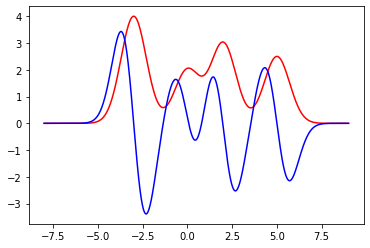

In [3]:
print('Seguono i grafici di f (in rosso) e della sua derivata (in blu):')
z=plt(X,Y,'red')
z=plt(X,Y1,'blue')

In [4]:
M = (round(X[Y.argmax()],5) , round(max(Y),5))
print('Il punto di massimo assoluto di f è:',M)

Il punto di massimo assoluto di f è: (-2.9998, 4.00025)


In [5]:
T=[]
k=-4

while k<6:
    T += Z(k,k+0.2)
    k+=0.2

print("Gli zeri di f' in [-4,6] sono:",T)

Gli zeri di f' in [-4,6] sono: [-2.99982, -1.3514, 0.06954, 0.79429, 1.97347, 3.53908, 4.99955]


In [6]:
print("L'integrale di f esteso a [-8,9] è:",round(I(f),8))

L'integrale di f esteso a [-8,9] è: 20.38321925


La primitiva F(x) rispetto a=0 in [-8,9] è:


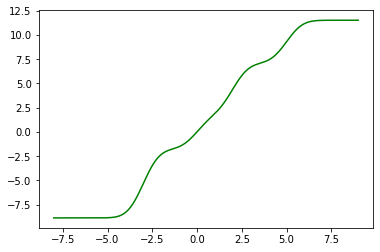

In [7]:
print("La primitiva F(x) rispetto a=0 in [-8,9] è:")
z=plt(X,Y2,'green')

In [8]:
print('La costante di normalizzazione N della distribuzione associata a f è: N =',round(1/I(f),8))

La costante di normalizzazione N della distribuzione associata a f è: N = 0.04905996


In [9]:
def g(x):
    return x*f(x)

mi=I(g)
print('La media della distribuzione è: mi =',round(mi,8))

La media della distribuzione è: mi = 11.52094972


In [10]:
def h(x):
    return (x-mi)**2 * f(x)

s2=I(h)
print('La varianza della distribuzione è: s^2 =',round(s2,8))
print('...cui corrisponde una deviazione standard pari a: s =',round(s2**(1/2),8))

La varianza della distribuzione è: s^2 = 2646.09440711
...cui corrisponde una deviazione standard pari a: s = 51.44020225
